In [13]:
# Importing necessary dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
X_train,y_train,X_test,y_test = X[:60000],y[:60000],X[60000:],y[60000:]
some_digit = X[0]


In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [22]:
# Example of Multiclass classifier
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilable = np.c_[y_train_large,y_train_odd]
print(y_multilable)

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [24]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilable)

KNeighborsClassifier()

In [25]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilable, cv=3)

In [29]:
from sklearn.metrics import f1_score
f1score_macro = f1_score (y_multilable, y_train_knn_pred, average="macro")
print(f1score_macro)

0.976410265560605


In [30]:
f1score_wgt = f1_score (y_multilable, y_train_knn_pred, average="weighted")
print(f1score_wgt)

0.9778357403921755


In [35]:
# Multioutput classification
noise1 = np.random.randint(0,100,(X_train.shape))
X_train_mod = X_train + noise1
noise2 = np.random.randint(0,100,(X_test.shape))
X_test_mod = X_test + noise2
y_train_mod = X_train
y_test_mode = X_test

In [58]:

def plot_digit(data,title,name):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.title(title)
    plt.savefig(name)
    
knn_clf.fit(X_train_mod,y_train_mod)
predic_digit = knn_clf.predict([X_train_mod[1]])

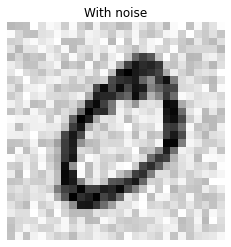

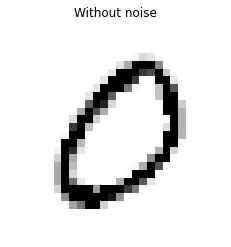

In [59]:
plot_digit(X_train_mod[1],"With noise", "noise")
plt.figure()
plot_digit(predic_digit,"Without noise", "noNoise")